In [407]:
import pandas as pd
import numpy as np
import random
import os
from num2words import num2words 

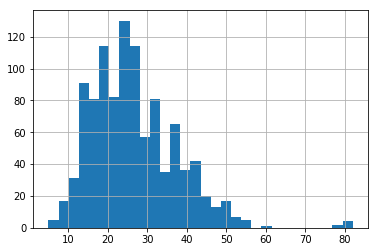

In [408]:
data = pd.read_csv("csvs/commands_v1.csv") 
ax = data["num_chars"].hist(bins = 30)

In [409]:
#data =  data.set_index('command_id')
data.loc[1].command_name # the explicit index is command_id that starts with 1!

'open my window for me'

In [410]:
data.index

RangeIndex(start=0, stop=1050, step=1)

In [438]:
num_copies = 2
ids = []
for i in range(num_copies):
    ids_curr =  list(data.index) # based on command_id
    random.shuffle(ids_curr)
    ids = ids + ids_curr
ids = np.array(ids)

In [444]:
frames_per_char = 5
max_num_frames = 900
num_pos = 9
num_trials = 2

path = os.getcwd()+"/csvs/v1/fpc{}/".format(frames_per_char)
if (not os.path.isdir(path)):
    try:
        os.mkdir(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
    else:
        print ("Successfully created the directory %s " % path)

Successfully created the directory /Users/madinaabdrakhmanova/Documents/text_commands_gen/csvs/v1/fpc5/ 


In [445]:
data.loc[ids[0]].num_chars*frames_per_char

120

In [446]:
df = pd.DataFrame(columns = ["command_name","command_id","set_id","pos_id","expr_id",'subject_id','trial_id',"start_fr_id", "end_fr_id"])
df['command_id'] = ids

i = 0
set_id = 1
while i<len(ids):
    t = i
    cum_command_num_fr = 1
    for j in range(i, len(ids)):
        curr_command_num_fr = data.loc[ids[j]].num_chars*frames_per_char
        if(cum_command_num_fr + curr_command_num_fr > max_num_frames):
            #print('max_num_frames - cum_command_num_fr: ', max_num_frames - cum_command_num_fr)
            #print('j-t: ',j-t)
            diff = np.ceil((max_num_frames - cum_command_num_fr)/(j-t))
            #print('diff: ',diff)
            
            temp_end = df[df.set_id==set_id].loc[:,'end_fr_id']
            temp_start = df[df.set_id==set_id].loc[:,'start_fr_id']
            #print('temp_start:\n',temp_start)
            #print('temp_end:\n',temp_end)
            
            diff_end = np.arange(1,len(temp_end)+1)*diff
            diff_start = np.arange(0,len(temp_end))*diff
            #print('diff_end:\n', diff_end)
            #print('diff_start:\n', diff_start)
            
            #print('temp_end+diff_end:\n', temp_end+diff_end)
            #print('temp_start+diff_start:\n', temp_start+diff_start)
            
            df.update(temp_end+diff_end)
            df.update(temp_start+diff_start)

            set_id += 1
            break
        else:
            df.loc[i, 'start_fr_id'] = cum_command_num_fr  
            cum_command_num_fr += curr_command_num_fr
            #print(curr_command_num_fr)
            df.loc[i, 'end_fr_id'] = cum_command_num_fr - 1 
            df.loc[i, 'set_id']= set_id
            df.loc[i, 'pos_id'] = (set_id-1)%num_pos+1
            df.loc[i, 'expr_id'] = int((set_id-1)/num_pos)+1
            df.loc[i, 'command_name'] = data.loc[ids[j]].command_name
            df.loc[i, 'subject_id'] = int((set_id-1)/num_pos/num_trials) + 1
            df.loc[i, 'trial_id'] = int((set_id-1)/num_pos)%num_trials + 1           
            i+=1

In [447]:
df.to_csv(path+'commands_sub_all_v1_fpc{}.csv'.format(frames_per_char))

In [448]:
for s_id in df.subject_id.unique():
    df_sub = df[df.subject_id==s_id]
    df_sub = df_sub.drop(columns=['set_id', 'expr_id'])
    df_sub_1 = df_sub[df.trial_id==1].copy()
    df_sub_1 = df_sub_1.drop(columns=['subject_id', 'trial_id'])
    df_sub_2 = df_sub[df.trial_id==2].copy()
    df_sub_2 = df_sub_2.drop(columns=['subject_id', 'trial_id'])
    df_sub_1.to_csv(path+'commands_sub{}_trial{}.csv'.format(s_id,1,frames_per_char))
    df_sub_2.to_csv(path+'commands_sub{}_trial{}.csv'.format(s_id,2,frames_per_char))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [449]:
df.head()

,command_name,command_id,set_id,pos_id,expr_id,subject_id,trial_id,start_fr_id,end_fr_id
0,science youtube channels,697,1,1,1,1,1,1,133
1,breaking news on fortune,734,1,1,1,1,1,134,266
2,upload a picture to facebook,298,1,1,1,1,1,267,419
3,turn off the vacuum cleaner,121,1,1,1,1,1,420,567
4,whether anyone closed the window,977,1,1,1,1,1,568,740


In [451]:
df.tail()

,command_name,command_id,set_id,pos_id,expr_id,subject_id,trial_id,start_fr_id,end_fr_id
2095,decrease volume on my speaker,25,339,6,38,19,2,630,800
2096,all my rss feed,913,339,6,38,19,2,801,901
2097,set the power on my lg tv to on,317,340,7,38,19,2,1,155
2098,the step count from fitbit,888,340,7,38,19,2,156,285
2099,put the shades up,238,340,7,38,19,2,286,370
